### STEP-3

In [44]:
#Importing necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

### STEP-4

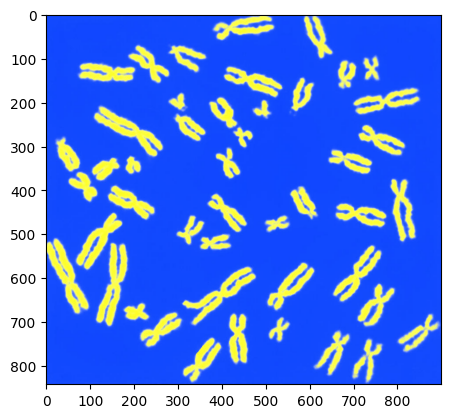

In [45]:
image = cv2.imread("chromosomes.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #converting BGR to RGB (since matplotlib reads images in RGB format)
plt.imshow(image_rgb)

### STEP-5

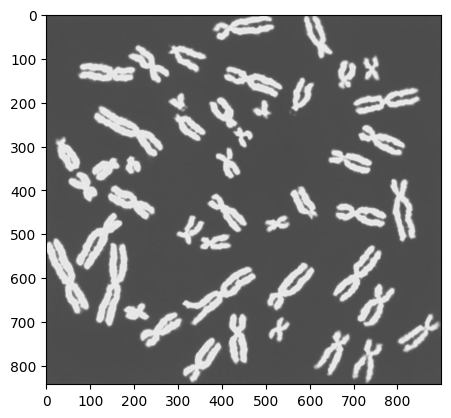

In [46]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image_rgb = cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB) #converting BGR to RGB (since matplotib reads images in RGB format))
plt.imshow(gray_image_rgb)

### STEP-6


Number of contours found: 46


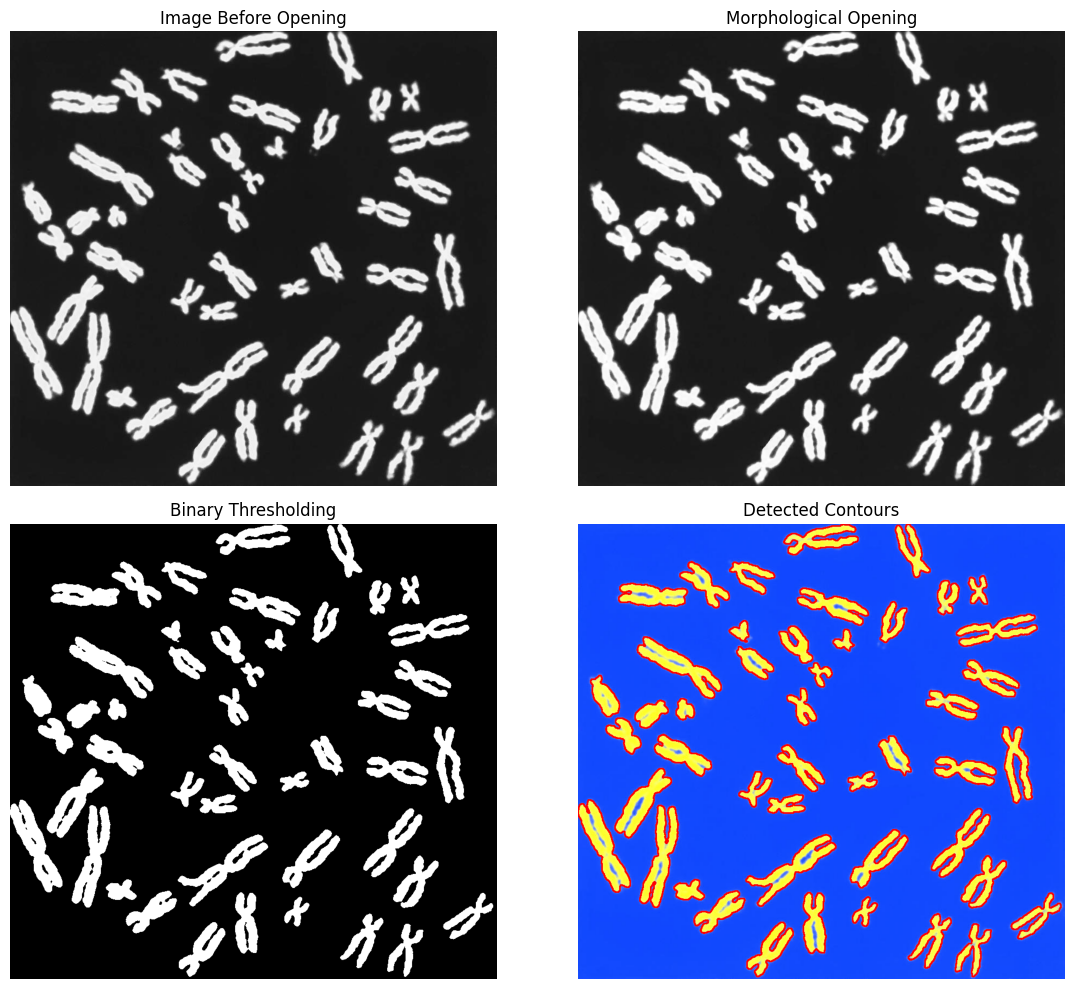

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)) #Used MORPH_ELLIPSE since its preffered for biological images
morphed_image = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)
ret, binary_image = cv2.threshold(morphed_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) #Automatic thresholding
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #Retrieval Mode - External, Approximation Method - Simple

print(f"Number of contours found: {len(contours)}")

plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
plt.imshow(gray_image, cmap= "gray")
plt.title('Image Before Opening')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(morphed_image, cmap='gray')
plt.title('Morphological Opening')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Thresholding')
plt.axis('off')

plt.subplot(2, 2, 4)
contour_img = image_rgb.copy()
cv2.drawContours(contour_img, contours, -1, (255, 0, 0), 2)
plt.imshow(contour_img)
plt.title('Detected Contours')
plt.axis('off')

plt.tight_layout()
plt.show()

### STEP-7

In [48]:
import pandas as pd 

data = []

for contour in contours: 
    if len(contour) > 5:
        x,y,w,h = cv2.boundingRect(contour)
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        circularity = (4 * np.pi * area) / (perimeter ** 2)

        data.append({'Height' : h, 'Width' : w, 'Area' : area, 'Perimeter' : perimeter, 'Circularity' : circularity})

df = pd.DataFrame(data) #dataframe before any standardization/normalization
df.head()

,Height,Width,Area,Perimeter,Circularity
0,98,67,2172.0,418.676187,0.155709
1,101,86,3084.5,441.428492,0.198918
2,101,80,2522.0,434.901583,0.167561
3,55,47,1012.0,217.137082,0.269726
4,86,93,2276.5,441.286357,0.146905


### STEP-8 and OUTPUT REFERENCE

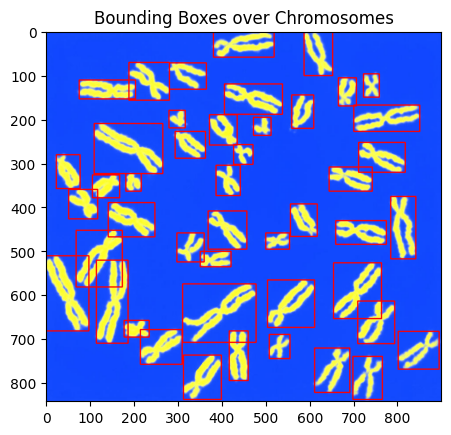

In [49]:
output_image = image_rgb.copy()

for contour in contours:
    if len(contour) >= 5: #threshold check (to filter out any noise, specs or spots)
        x,y,w,h = cv2.boundingRect(contour)
        cv2.rectangle(output_image, (x,y), (x+w, y+h), (255,0,0), 2)

plt.imshow(output_image)
plt.title('Bounding Boxes over Chromosomes')
plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler #imported for Z and MinMax normalization

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df_standardized = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)
df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)

print("Standardized Dataset \n")
print(df_standardized.head(10))

print("\n Normalized Dataset \n")
print(df_normalized.head(10))

Standardized Dataset 

     Height     Width      Area  Perimeter  Circularity
0  0.527895 -0.416766 -0.354968   0.385582    -0.969162
1  0.614107  0.151492  0.327428   0.542548    -0.661625
2  0.614107 -0.027958 -0.093227   0.497519    -0.884805
3 -0.707816 -1.014934 -1.222453  -1.004813    -0.157656
4  0.183045  0.360851 -0.276820   0.541567    -1.031823
5  0.958957 -1.134567  0.616092   0.034636     0.217085
6 -0.018117  0.420668  0.239184  -0.031412    -0.009902
7 -1.196353 -0.715850 -0.985017  -1.250112     1.529053
8  0.499157  0.091676  0.199175   0.664073    -0.840991
9  1.533706  2.574069  2.095303   1.752185    -0.796352

 Normalized Dataset 

     Height     Width      Area  Perimeter  Circularity
0  0.409091  0.242424  0.273347   0.508684     0.080770
1  0.428571  0.386364  0.446202   0.548842     0.159476
2  0.428571  0.340909  0.339648   0.537322     0.102359
3  0.129870  0.090909  0.053609   0.152970     0.288453
4  0.331169  0.439394  0.293143   0.548591     0.064734
5 

### REPORT

##### **Q1**:  How  can  contour  detection  be  used  to  identify  objects  in  an  image?

- Contour detection finds object boundaries by tracing connected pixels in binary images.
- The flow typically is first to perform morphological operation -> conversion to binary image -> finding out contours
- Each contour represents one object's outline allowing us to find out many things related to the object suich as Area, perimeter and Dimensions. 
- In this lab, it identified individual chromosomes.


##### **Q2**: What  is  the  importance  of  standardization  of  data? What  difference  did  you  observe before and after standardization?

- **Importance:** Scales features to mean=0, std=1. Makes features comparable and required for ML algorithms sensitive to magnitude 
- **Observation:** Original data had different scales (Width ~100, Area ~3000). After standardization, all features centered at 0 with similar spread, making them directly comparable.


##### **Q3**:  Let’s consider one of the values in the width column is missing.  How to handle this missing value?

- Fill it with Median : `df['Width'].fillna(df['Width'].median())` 
- Fill it with Mean: `df['Width'].fillna(df['Width'].mean())` 
- Drop row: `df.dropna()` (if there are only few missing values)
- Additional Advanced methods include : LinearRegression, Iterpolation, KNN, Groupby imputation (using some category)

##### **Q4**:  What is the importance of data normalization?  What difference did you observe before and after normalization?

- **Importance:** Scales all values to [0,1] range. Required for distance-based algorithms and neural networks.
- **Observation:** Original data had wide ranges. After normalization, all features scaled to [0,1] with min=0 and max=1. More compression of outliers compared to standardization.

##### **Q5**: How  might  you  adapt  the  bounding  box  construction  process  to  handle  overlapping  or touching chromosomes?

- Watershed algorithm (Marker Controlled version with preprocessing like morphological operation or distance transforms) - separates touching objects by treating image as topographic surface [Ref](https://www.geeksforgeeks.org/computer-vision/image-segmentation-with-watershed-algorithm-opencv-python/) (https://tinyurl.com/watershedref)
- Deep learning - for complex cases 